# WPS call for event attribution using analogues

The objective is to assess the role of atmospheric circulation in the observed temperature anomalie in january 2018.

With the method of analogues, we will simulate others possible realisations of temperature anomalies in january 2018 by taking analogues in two differents periods (P1: 1948-1980 and P2: 1981-2016). 

Those two simulated distributions can be used to have an estimation of the probabilities of having higher temperature than what was observed in january 2018 conditionally to the observed atmospheric circulation in the past and present climate (P1 vs P2).

If the distribution of the simulated temperatures are significantly different between the two periods, it would suggest that another factor outside of atmospheric circulation is needed to explain the shift in the distribution of temperatures.



### Ex 1. Analogues Computation

Use the Blackswan process "analogs_reanalyse" to find analogues of circulation over the North Atlantic (-80W,30E,30N,70N)for each day of January 2018 in the period P1 (1948-1980) and the period P2 (1981-2016).


In [1]:
##############################
# load the required libraries 
#############################

# from owslib.wps import WebProcessingService, monitorExecution, printInputOutput
from owslib.wps import WebProcessingService, monitorExecution, printInputOutput, ComplexDataInput


from os import system
import time

In [2]:
#################################################
# connect to the compute provider hosting the WPS
#################################################

#wps_url = "http://birdhouse.lsce.ipsl.fr:8096/wps"
wps_url = "http://localhost:8096/wps"
#wps_url = "http://wps-test.ipsl.jussieu.fr:8096/wps"
wps = WebProcessingService(url=wps_url, verbose=False)

In [3]:
##########################################
# print some information about the service
##########################################

print wps.identification.title + ':'
print '#############'
for process in wps.processes:
    print '%s : \t %s' % (process.identifier, process.abstract)

Blackswan 1.1_dev:
#############
weatherregimes_reanalyse : 	 k-mean cluster analyse of the pressure patterns. Clusters are equivalent to weather regimes
weatherregimes_model : 	 k-mean cluster analyse of the pressure patterns. Clusters are equivalent to weather regimes
analogs_reanalyse : 	 Search for days with analogue pressure pattern for reanalyses data sets
analogs_model : 	 Search for days with analogue pressure pattern for models data sets
analogs_compare : 	 Search for days with analogue pressure pattern for reanalyses data sets
analogs_re2re : 	 Search for days with analogue pressure pattern for NCEP in 20CRV2c reanalyses data sets
analogs_viewer : 	 Visualisation of text output of analogue process
analogs_cta : 	 Search for days with analogue pressure pattern for reanalyses data sets
simple_plot : 	 Returns a nice and simple plot.
pythonanattribution : 	 Attributioms with analogues


In [4]:
#################################################
# print some information about a specific process
#################################################

# to recieve informations uncomment the follwing lines

p = wps.describeprocess(identifier='analogs_reanalyse')
for input in p.dataInputs:
    printInputOutput(input)
    print '\n'

 identifier=reanalyses, title=Reanalyses Data, abstract=Choose a reanalyses dataset for comparison, data type=string
 Allowed Value: NCEP_slp
 Allowed Value: NCEP_z1000
 Allowed Value: NCEP_z925
 Allowed Value: NCEP_z850
 Allowed Value: NCEP_z700
 Allowed Value: NCEP_z600
 Allowed Value: NCEP_z500
 Allowed Value: NCEP_z400
 Allowed Value: NCEP_z300
 Allowed Value: NCEP_z250
 Allowed Value: NCEP_z200
 Allowed Value: NCEP_z150
 Allowed Value: NCEP_z100
 Allowed Value: NCEP_z70
 Allowed Value: NCEP_z50
 Allowed Value: NCEP_z30
 Allowed Value: NCEP_z20
 Allowed Value: NCEP_z10
 Allowed Value: 20CRV2_prmsl
 Allowed Value: 20CRV2_z1000
 Allowed Value: 20CRV2_z950
 Allowed Value: 20CRV2_z900
 Allowed Value: 20CRV2_z850
 Allowed Value: 20CRV2_z800
 Allowed Value: 20CRV2_z750
 Allowed Value: 20CRV2_z700
 Allowed Value: 20CRV2_z650
 Allowed Value: 20CRV2_z600
 Allowed Value: 20CRV2_z550
 Allowed Value: 20CRV2_z500
 Allowed Value: 20CRV2_z450
 Allowed Value: 20CRV2_z400
 Allowed Value: 20CRV2_z35

In [5]:
# get information about the call command:
wps.execute?

In [6]:
#####################
# execute the process
#####################

# call asyncon with sleepSecs

start_time = time.time()

anaxecute0 = wps.execute(
    identifier="analogs_reanalyse", 
    inputs=[
        #("dist",'euclidean'),
        ("BBox","-30,20,40,65"),
        ("dateSt", "2018-01-01"),
        ("dateEn", "2018-01-31"),
        ("refSt", "1948-01-01"),
        ("refEn", "2016-12-31"),
        #("plot", "Yes")
        ("plot", "No")
    ], async=True)

monitorExecution(anaxecute0, sleepSecs=1)

print time.time() - start_time, "seconds"

print anaxecute0.getStatus()



52.7408230305 seconds
ProcessSucceeded


In [7]:
for o in anaxecute0.processOutputs:
    print o.reference
    
# Some files you want to have a look at:,
# the results of the analogues computation are in ouput.txt
# analogview.html allows us to look at statistics of the analogues
# log.txt is the log file of the process to check whether everything went fine
# If you select ("plot", "Yes") in execute above, you will have nice maps with analogues.
# But for one month there will be ~ 180 plots in pdf file, and it takes time
# So, you if have time left, you may try it!

http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/dummy_sim.nc
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/dummy_base.nc
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/sim_slp_2018-01-01_2018-01-31_-30.0_20.0_40.0_65.0.nc
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/base_slp_1948-01-01_2016-12-31_-30.0_20.0_40.0_65.0.nc
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/analogviewer.html
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/config.txt
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/output.txt
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/dummy_plot.pdf
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/log.txt
http://localhost:8090/wpsoutputs/blackswan/adf238dc-38c8-11e8-9f22-d89ef3118394/m

In [8]:
#####################
# execute the process
#####################

# call asyncon with sleepSecs

start_time = time.time()

anaxecute1 = wps.execute(
    identifier="analogs_reanalyse", 
    inputs=[
        ("reanalyses", "NCEP_slp"),
        ("dist",'euclidean'),
        ("BBox","-15,15,40,60"),
        ("dateSt", "2018-01-01"),
        ("dateEn", "2018-01-31"),
        ("refSt", "1948-01-01"),
        ("refEn", "1980-12-31"),
        ("plot", "No"),
        ("normalize","base")
        #("detrend", "UVSpline")
        #("plot", "No")
    ], async=True)

monitorExecution(anaxecute1, sleepSecs=1)

print time.time() - start_time, "seconds"

print anaxecute1.getStatus()



52.7565641403 seconds
ProcessSucceeded


In [9]:
for o in anaxecute1.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/seasoncyc_sim.nc
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/seasoncyc_base.nc
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/sim_slp_2018-01-01_2018-01-31_-15.0_15.0_40.0_60.0.nc
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/base_slp_1948-01-01_1980-12-31_-15.0_15.0_40.0_60.0.nc
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/analogviewer.html
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/config.txt
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/output.txt
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/dummy_plot.pdf
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/log.txt
http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3

In [10]:
# # execute the process
#####################

# call asyncon with sleepSecs

start_time = time.time()

anaxecute2 = wps.execute(
    identifier="analogs_reanalyse", 
    inputs=[
        ("reanalyses", "NCEP_slp"),
        ("dist",'euclidean'),
        #("BBox","-30,20,40,65"),
        ("BBox","-15,15,40,60"),
        ("dateSt", "2018-01-01"),
        ("dateEn", "2018-01-31"),
        ("refSt", "1981-01-01"),
        ("refEn", "2016-12-31"),
        #("detrend", "UVSpline")
        #("plot", "Yes"),
        ("normalize","base")
        #("plot", "No")
    ], async=True)

monitorExecution(anaxecute2, sleepSecs=1)

print time.time() - start_time, "seconds"

print anaxecute2.getStatus()



31.6625361443 seconds
ProcessSucceeded


In [11]:
for o in anaxecute2.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/seasoncyc_sim.nc
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/seasoncyc_base.nc
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/sim_slp_2018-01-01_2018-01-31_-15.0_15.0_40.0_60.0.nc
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/base_slp_1981-01-01_2016-12-31_-15.0_15.0_40.0_60.0.nc
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/analogviewer.html
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/config.txt
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/output.txt
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/dummy_plot.pdf
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/log.txt
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3

### Ex. 2 Attribution with analogues

1. Use the function analogs_generator available below to simulate other possible mean temperatures for January 2018 using analogues found in the first period and analogues found in the second period.

2. Compare the distributions of temperature anomalies obtained in the two period by plotting boxplots or histograms.

3. Estimate the probabilities of having a temperature higher than what was observed in January 2008 for both periods.

    The mean daily temperature over Europe from NCEP reamalysis are available in the file : 
https://files.lsce.ipsl.fr/public.php?service=files&t=65264bb8ea2a08d55c198b73a43366c8&download
    and the anomalies:
https://files.lsce.ipsl.fr/public.php?service=files&t=400f0ef2c93929741d7a0011deb0954f&download

(***optional*** : redo the analisys with precipitation data at Blagnac weather station:
https://files.lsce.ipsl.fr/public.php?service=files&t=4d694025db4df296d55513af5f68775c&download)






In [12]:
ana_p1_file = anaxecute1.processOutputs[6].reference
ana_p2_file = anaxecute2.processOutputs[6].reference
tas_file = "https://files.lsce.ipsl.fr/public.php?service=files&t=65264bb8ea2a08d55c198b73a43366c8&download"
ano_file = "https://files.lsce.ipsl.fr/public.php?service=files&t=400f0ef2c93929741d7a0011deb0954f&download"
pr_file = "https://files.lsce.ipsl.fr/public.php?service=files&t=4d694025db4df296d55513af5f68775c&download"
print ana_p1_file
print ana_p2_file
print tas_file
print ano_file

ano_file = tas_file
#pr_file="RR_quot_Blagnac.dat"
#ano_file = pr_file

http://localhost:8090/wpsoutputs/blackswan/cdaaed9a-38c8-11e8-9f22-d89ef3118394/output.txt
http://localhost:8090/wpsoutputs/blackswan/ed2b967e-38c8-11e8-9f22-d89ef3118394/output.txt
https://files.lsce.ipsl.fr/public.php?service=files&t=65264bb8ea2a08d55c198b73a43366c8&download
https://files.lsce.ipsl.fr/public.php?service=files&t=400f0ef2c93929741d7a0011deb0954f&download


In [13]:
import pandas
import random
import numpy as np

def analogs_generator(anafile, yfile, nsim = 20):
    # Simulates nsim values of the variable y using analogues for all the dates present in the file anafile
    # anafile path to a file with the results of the analogues
    # yfile path to the file containing the data. The file should have two columns: 
    # - the first with the date with the following for format yyyymmdd
    # - the second with the variable of interest y, columns are separated by spaces and are supposed to have headers
    # nsim the number of simulations of the variablle y to generate with the analogues
    def weight_analogues(date):
        dist = disttable.loc[[date], :].transpose()
        date = anatable.loc[[date], :].transpose()
        weights = pandas.concat([date.reset_index(drop=True), dist.reset_index(drop=True)], axis = 1)
        weights.columns = ['date', 'dist']
        weights = weights.set_index('date')
        return weights
    def select_y_analogues(date):
        bidx = ytable.index.isin(anatable.loc[date, :])
        return ytable.iloc[bidx, 0] 
    def generate_cond_ymean(date, nsim = 20):
        weights = weight_analogues(date)
        ys = select_y_analogues(date)
        dat = pandas.concat([ys, weights], axis = 1, join = "inner")
        weights = np.random.multinomial(nsim, dat.dist / sum(dat.dist))
        return random.sample(np.repeat(dat.iloc[:, 0], weights), nsim)
    ytable = pandas.read_table(yfile, sep = " ", skipinitialspace = True)
    anatable = pandas.read_table(anafile, sep = " ", skipinitialspace = True)
    nanalogs = len([s for s in anatable.columns if "dis" in s])
    disttable = anatable.iloc[:, [0] + range(nanalogs + 1, 2 * nanalogs + 1)].copy()
    cortable = anatable.iloc[:, [0] + range(2 * nanalogs + 1, 3 * nanalogs + 1)].copy()
    anatable = anatable.iloc[:, 0:(nanalogs + 1)].copy()
    ytable = ytable.set_index('date')
    disttable = disttable.set_index('date')
    cortable = cortable.set_index('date')
    anatable = anatable.set_index('date')
    condys = map(generate_cond_ymean, anatable.index, np.repeat(nsim, len(anatable.index)))
    condys = pandas.DataFrame(condys)
    condys = condys.transpose()
    #condys = [x.reset_index(drop=True) for x in condys]
    #condys = pandas.concat(condys, axis = 1)
    condys.columns = anatable.index
    return condys
    #condyms = condys.mean(axis=1)
    #return condyms


In [14]:
# compute the average of temperature in January 2018
ytable = pandas.read_table(ano_file, sep = " ", skipinitialspace = True)
#print ytable.date >= 20180101 
idx = [x >= 20180101 and x <= 20180131 for x in ytable.date]
tas_jan18 = ytable.iloc[idx, 1]
tas_jan18 = tas_jan18.mean(axis=0)

# generate other possible realisations of temperature for January 2018 conditionnaly to the atmospheric circulation 
nsim = 10000

#for period P1
ysim_p1 = analogs_generator(anafile = ana_p1_file, yfile = ano_file, nsim = nsim)
ymean_p1 = ysim_p1.mean(axis = 1)
print ysim_p1.shape

#for period P2
ysim_p2 = analogs_generator(anafile = ana_p2_file, yfile = ano_file, nsim = nsim)
ymean_p2 = ysim_p2.mean(axis = 1)

(10000, 31)


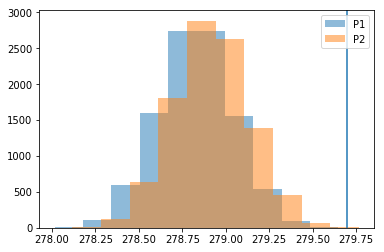

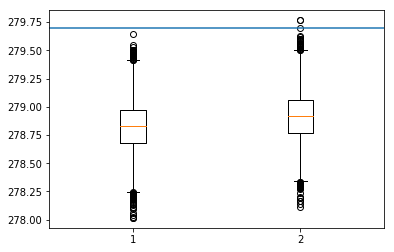

1.0
0.9997


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.hist(ymean_p1, alpha=0.5, label='P1')
plt.hist(ymean_p2, alpha=0.5, label='P2')
plt.axvline(x=tas_jan18)
plt.legend(loc='upper right')
plt.savefig('slp_1948_1980__1981_2016_SMALLDOM_TAS.png')
plt.show()


plt.figure()
plt.boxplot([ymean_p1, ymean_p2])
plt.axhline(y=tas_jan18)
plt.savefig('slp_1948_1980__1981_2016_SMALLDOM_TAS2.png')
plt.show()

prob1 = (tas_jan18 >= ymean_p1)
prob1 = prob1.mean(axis=0)

prob2 = (tas_jan18 >= ymean_p2)
prob2 = prob2.mean(axis=0)

print prob1
print prob2

### Ex. 3 Implementing process into Birdhouse

Implement a WPS process (let's call pythonanattribution) in blackswan to perform this analysis. One can use as exemple or template other blackswan processes.

The process should take as inputs:
- one file (yfile) containing the time series of the variable of interest y. The files should contain two columns, the first for the date (format yyyymmdd) and the second for the variable y
- one file (anafile1) for the analogues found in a period P1
- one file (anafile2) for the analogues found in a period P2

The process should return:
- one pdf (anna_plots.pdf)file with one graphic (histogram of boxplot) to compare the distributions of y conditionally to the circulation obtain in period 1 and 2
- one text file anna_ysim.txt with the simulations of y generated with the analogues 

In [16]:
##########################################
# print some information about the process
##########################################

p = wps.describeprocess(identifier='pythonanattribution')
for input in p.dataInputs:
    printInputOutput(input)
    print '\n'

 identifier=nsim, title=numbers of simulated Y to generate with analogues, abstract=number of simulations, data type=integer
 Any value allowed
 Default Value: 20 
 minOccurs=0, maxOccurs=1


 identifier=yfile, title=file with date and value of Y, abstract=file with date and value of Y, data type=ComplexData
 Supported Value: mimeType=text/plain, encoding=None, schema=None
 Default Value: mimeType=text/plain, encoding=None, schema=None 
 minOccurs=1, maxOccurs=1


 identifier=anafile1, title=Analogues result file for period P1, abstract=Analogues text file computed by Analogues of Circulation processes, data type=ComplexData
 Supported Value: mimeType=text/plain, encoding=None, schema=None
 Default Value: mimeType=text/plain, encoding=None, schema=None 
 minOccurs=1, maxOccurs=1


 identifier=anafile2, title=Analogues result file for period P2, abstract=Analogues text file computed by Analogues of Circulation processes, data type=ComplexData
 Supported Value: mimeType=text/plain, encod

In [17]:
###########################################
# and execute the process for attribution
###########################################

inputs=[('nsim', '10000'),
        ('anafile1', ComplexDataInput(ana_p1_file)),
        ('anafile2', ComplexDataInput(ana_p2_file)),
        ('yfile', ComplexDataInput(ano_file))]
print inputs

anattr = wps.execute(identifier = "pythonanattribution", 
                     inputs = inputs,
                     async=False)

print anattr.isSucceded()

print anattr.getStatus()
for o in anattr.processOutputs:
    print o.reference

[('nsim', '10000'), ('anafile1', <owslib.wps.ComplexDataInput object at 0x7f4c1b064410>), ('anafile2', <owslib.wps.ComplexDataInput object at 0x7f4c1b064ed0>), ('yfile', <owslib.wps.ComplexDataInput object at 0x7f4c1b064b10>)]
True
ProcessSucceeded
http://localhost:8090/wpsoutputs/blackswan/4b61e054-38c9-11e8-9f22-d89ef3118394/anna_plotsRpSNSy.pdf
http://localhost:8090/wpsoutputs/blackswan/4b61e054-38c9-11e8-9f22-d89ef3118394/anna_ysimUmTH8q.txt
http://localhost:8090/wpsoutputs/blackswan/4b61e054-38c9-11e8-9f22-d89ef3118394/log.txt
